# Cài đặt môi trường

In [1]:
%cd /content/drive/MyDrive/20220322-Training-maskrcnn

/content/drive/MyDrive/20220322-Training-maskrcnn


In [ ]:
#!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 13.76 MiB/s, done.
Resolving deltas: 100% (565/565), done.
Checking out files: 100% (76/76), done.


In [2]:
%cd Mask_RCNN/

/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python3 setup.py install

In [ ]:
#!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/mask_rcnn_balloon.h5

In [ ]:
#!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip

In [ ]:
#!unzip balloon_dataset.zip

In [ ]:
#!python3 balloon.py splash --weights=mask_rcnn_balloon.h5 --image='/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/datasets/balloon/val/14898532020_ba6199dd22_k.jpg'

In [ ]:
#!mkdir datasets

#Training

In [ ]:
!python3 balloon.py train --dataset=/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/datasets/balloon --weights=coco

#Test splash

In [9]:
#test splash
!python3 balloon.py splash --weights='/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/logs/balloon20220322T1435/mask_rcnn_balloon_0001.h5' --image='/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/datasets/balloon/val/14898532020_ba6199dd22_k.jpg'

Using TensorFlow backend.
Weights:  /content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/logs/balloon20220322T1435/mask_rcnn_balloon_0001.h5
Dataset:  None
Logs:  /content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARN

#Test

In [18]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

############################################################
#  Configurations
############################################################


class BalloonConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "balloon"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + balloon

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

In [24]:
config = BalloonConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [25]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=DEFAULT_LOGS_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights('/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/logs/balloon20220322T1435/mask_rcnn_balloon_0001.h5', by_name=True)

Re-starting from epoch 1


In [26]:
class_names = ['BG','Balloon']

Processing 1 images
image                    shape: (1365, 2048, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


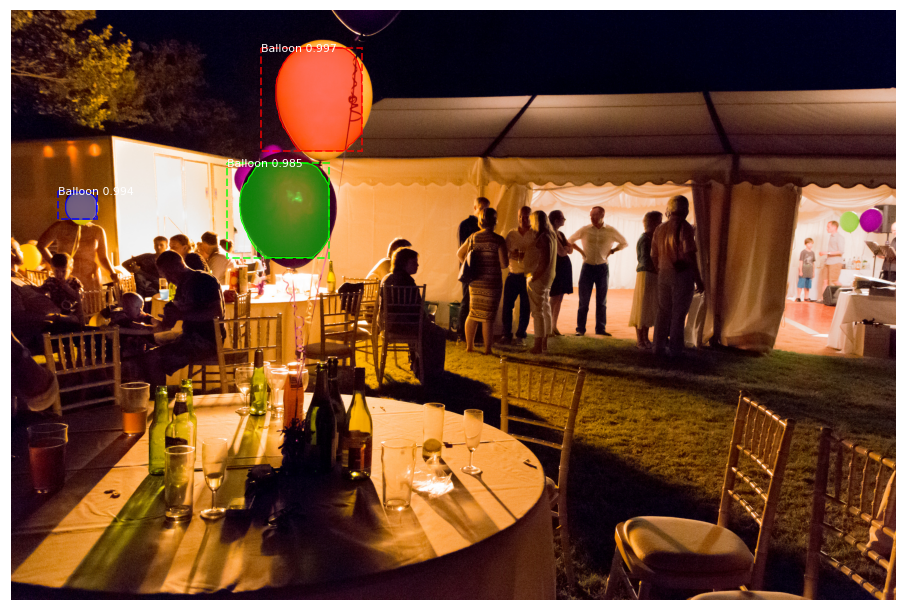

In [37]:
from mrcnn import visualize
# Load a random image from the images folder
image = skimage.io.imread('/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/datasets/balloon/val/14898532020_ba6199dd22_k.jpg')
len([image])
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])